In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rice_ml.supervised_learning import RegressionTreeRegressor

df = pd.read_csv("../data/lesions_processed.csv")

X = df[["x_norm","y_norm","slice_norm","r_xy","experiment"]].values
y = df["tampered"].values.astype(float)

rng = np.random.default_rng(42)
idx = np.arange(len(y))
rng.shuffle(idx)
split = int(0.75*len(y))
tr, te = idx[:split], idx[split:]

model = RegressionTreeRegressor(max_depth=4, random_state=42)
model.fit(X[tr], y[tr])

pred = model.predict(X[te])
pred_class = (pred >= 0.5).astype(int)
acc = np.mean(pred_class == y[te].astype(int))

acc


np.float64(0.7441860465116279)

In [4]:
# Confusion matrix
y_true = y[te].astype(int)
y_hat = pred_class.astype(int)

cm = np.zeros((2,2), dtype=int)
for t, p in zip(y_true, y_hat):
    cm[t, p] += 1

cm




array([[ 6,  5],
       [ 6, 26]])

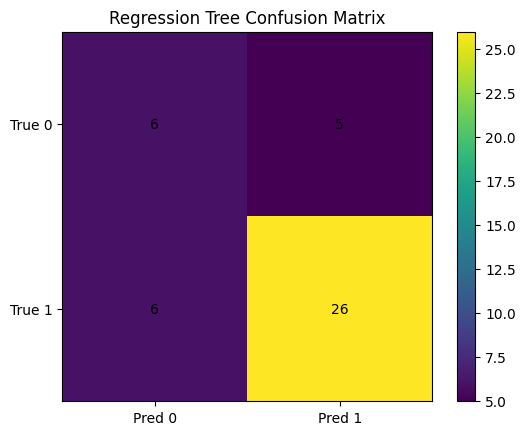

In [8]:
plt.imshow(cm)
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
plt.title("Regression Tree Confusion Matrix")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha="center", va="center")
plt.show()



In [5]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / (TP + FP) if (TP + FP) else 0
recall    = TP / (TP + FN) if (TP + FN) else 0
f1        = 2*precision*recall/(precision+recall) if (precision+recall) else 0

acc = (TP + TN) / cm.sum()
acc, precision, recall, f1

(np.float64(0.7441860465116279),
 np.float64(0.8387096774193549),
 np.float64(0.8125),
 np.float64(0.8253968253968254))